# Initial data for ICON idealized simulation: temperature, qv, zonal wind on pressure coord

Modified from the script by Nicole Knopf

In [1]:
# load packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# output path
#opath = '/work/bb1152/Module_A/A6_CyclEx/b382037_TingChen/Task3/icon_postprocessing_scripts/paper_figurescript/'
opath = './'

# read data
ipath = '/work/bb1152/Module_A/A6_CyclEx/input_data/'

ds_ctl = xr.open_dataset(ipath + 'lc1_CTL_r720x360.nc').sel(lat=slice(0,90)).squeeze()
ds_4k = xr.open_dataset(ipath + 'lc1_4K_r720x360.nc').sel(lat=slice(0,90)).squeeze()
ds_4k_qvctl = xr.open_dataset(ipath + 'lc1_4K_qvCTL_r720x360.nc').sel(lat=slice(0,90)).squeeze()
ds_tanom = xr.open_dataset(ipath + 'lc1_Tanom_r720x360.nc').sel(lat=slice(0,90)).squeeze()
ds_tanom_tr = xr.open_dataset(ipath + 'lc1_Tanom_tropics_r720x360.nc').sel(lat=slice(0,90)).squeeze()
ds_tanom_po = xr.open_dataset(ipath + 'lc1_Tanom_polar_r720x360.nc').sel(lat=slice(0,90)).squeeze()

del ipath

In [2]:
g        = 9.81               # gravitational acceleration
R        = 287.04             # gas constant

def get_theta(t, p, nlevs, nlats):
    '''
    # function that calculates the potential temperature for given Temperature(t in Kelvin) and pressure,
    '''
    theta = np.full((nlevs, nlats),np.nan,dtype=np.float64)
    
    for le in range(nlevs):
        for la in range(nlats):
            theta[le,la] = t[le,la] * ( 1.e5 / p[le]) ** 0.286
    return theta

def get_T_v(t, shu):
    '''
    # function that calculates the virtual temperature for given Temperature(t in Kelvin),
    # Relative Humidity(rh [0-100]) & Pressure(p in hPa)
    # we calculate the specific humidity
    '''
    T_v = t * (1 + 0.608 * shu)
    return T_v



def get_N(theta, t, p, nlevs, nlats):
    '''
    # function that calculates the Brunt–Väisälä frequency
    # https://glossary.ametsoc.org/wiki/Brunt-v%C3%A4is%C3%A4l%C3%A4_frequency
    # we use pressure coordinate:
    # https://snowball.millersville.edu/~adecaria/ESCI342/ANSWERS/esci342_exercises_answers_lesson12.html
    # N**2 = - P / (R * T_v) * g**2 / theta_v * (d theta_v) / (d p) 
    '''
    N = np.full((nlevs, nlats),np.nan,dtype=np.float64)
    
    for le in range(nlevs):
        leU = min (le+1, nlevs-1)
        leL = max (le-1, 0)
        N[le,:] = (- p[le] / R / t[le,:] * g**2 / theta[le,:] * (theta[leU,:]-theta[leL,:]) / (p[leU]-p[leL]) )**0.5
     
    return N

def get_dTdz( t, z, nlevs, nlats):
    
    dTdz = np.full((nlevs, nlats),np.nan,dtype=np.float64)
    
    for le in range(nlevs):
        leU = min (le+1, nlevs-1)
        leL = max (le-1, 0)
        dTdz[le,:] = ( (t[leU,:]-t[leL,:]) / (z[leU]-z[leL]) )
     
    return dTdz


In [3]:
temp_ctl = ds_ctl['T'].mean('lon')
temp_4k = ds_4k['T'].mean('lon')
temp_4k_qvctl = ds_4k_qvctl['T'].mean('lon')
temp_tanom = ds_tanom['T'].mean('lon')
temp_tanom_tr = ds_tanom_tr['T'].mean('lon')
temp_tanom_po = ds_tanom_po['T'].mean('lon')


diff= temp_tanom-temp_ctl
diff_lat = diff.mean('lat')
#print(diff_lat)
#diff_mean = diff_lat.mean('lev')
#print(diff_mean)
#temp_tanom_lat = temp_tanom.mean('lat')

In [4]:
print(temp_ctl.shape)

(137, 180)


In [7]:
print(ds_ctl['lat'])

<xarray.DataArray 'lat' (lat: 180)>
array([ 0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,  4.25,  4.75,
        5.25,  5.75,  6.25,  6.75,  7.25,  7.75,  8.25,  8.75,  9.25,  9.75,
       10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75, 14.25, 14.75,
       15.25, 15.75, 16.25, 16.75, 17.25, 17.75, 18.25, 18.75, 19.25, 19.75,
       20.25, 20.75, 21.25, 21.75, 22.25, 22.75, 23.25, 23.75, 24.25, 24.75,
       25.25, 25.75, 26.25, 26.75, 27.25, 27.75, 28.25, 28.75, 29.25, 29.75,
       30.25, 30.75, 31.25, 31.75, 32.25, 32.75, 33.25, 33.75, 34.25, 34.75,
       35.25, 35.75, 36.25, 36.75, 37.25, 37.75, 38.25, 38.75, 39.25, 39.75,
       40.25, 40.75, 41.25, 41.75, 42.25, 42.75, 43.25, 43.75, 44.25, 44.75,
       45.25, 45.75, 46.25, 46.75, 47.25, 47.75, 48.25, 48.75, 49.25, 49.75,
       50.25, 50.75, 51.25, 51.75, 52.25, 52.75, 53.25, 53.75, 54.25, 54.75,
       55.25, 55.75, 56.25, 56.75, 57.25, 57.75, 58.25, 58.75, 59.25, 59.75,
       60.25, 60.75, 61.25, 61.75, 62.25

In [6]:
print(temp_ctl[-1,:])

<xarray.DataArray 'T' (lat: 180)>
array([299.9422 , 299.9422 , 299.9422 , 299.9422 , 299.9422 , 299.9422 ,
       299.94223, 299.9422 , 299.9422 , 299.9422 , 299.94217, 299.94217,
       299.9421 , 299.94205, 299.942  , 299.94183, 299.94165, 299.94138,
       299.94095, 299.94043, 299.93967, 299.9387 , 299.93738, 299.9357 ,
       299.93356, 299.9308 , 299.9273 , 299.923  , 299.91766, 299.91113,
       299.90317, 299.8936 , 299.88205, 299.86832, 299.85205, 299.83282,
       299.81036, 299.78412, 299.7537 , 299.71857, 299.67816, 299.63193,
       299.57922, 299.5194 , 299.45172, 299.37555, 299.29   , 299.1944 ,
       299.08786, 298.96948, 298.83844, 298.69385, 298.53482, 298.36038,
       298.16968, 297.96176, 297.7358 , 297.49088, 297.22607, 296.9407 ,
       296.63394, 296.30505, 295.95337, 295.5783 , 295.17926, 294.7559 ,
       294.30783, 293.83478, 293.33658, 292.81317, 292.26465, 291.69113,
       291.09296, 290.4706 , 289.82455, 289.15555, 288.4643 , 287.75177,
       287.01904,

In [13]:
qv_ctl = ds_ctl['QV'].mean('lon')
qv_4k = ds_4k['QV'].mean('lon')
qv_4k_qvctl = ds_4k_qvctl['QV'].mean('lon')
qv_tanom = ds_tanom['QV'].mean('lon')
qv_tanom_tr = ds_tanom_tr['QV'].mean('lon')
qv_tanom_po = ds_tanom_po['QV'].mean('lon')

In [14]:
u_ctl = ds_ctl['U'].mean('lon')
u_4k = ds_4k['U'].mean('lon')
u_4k_qvctl = ds_4k_qvctl['U'].mean('lon')
u_tanom = ds_tanom['U'].mean('lon')
u_tanom_tr = ds_tanom_tr['U'].mean('lon')
u_tanom_po = ds_tanom_po['U'].mean('lon')

In [15]:
def load_levelinfo():
    from netCDF4 import Dataset
    ipath = '/work/bb1152/Module_A/A6_CyclEx/input_data/'
    file = Dataset(ipath + 'ifs2icon_verticalgridinfo_137levels.nc', 'r')
    hyam = np.squeeze(np.array(file.variables['hyam']))
    hybm = np.squeeze(np.array(file.variables['hybm']))   
    return hyam, hybm
    
hyam, hybm = load_levelinfo()
    
# constants
# physical constants are set to the values used in icon-nwp-2.0.15/src/shared/mo_physical_constants.f90
H      = 7.5e3          # in m
p0     = 1.0e5          # globally-uniform surface pressure in Pa



# vertical grid: for computation of initial state we convert the ifs2icon hybrid levels
# to height levels assuming a globally-uniform surface pressure (defined above)
# and defining ehight according to Polvani and Elsner as z = H ln (p0/p)
p  = hyam + hybm*p0
z  = H*np.log(p0/p)  # np.log is natural logarithm
nz   = z.size

print(ds_ctl['T'].shape)
print(temp_ctl.shape)
#print(len(z),z)
#print(np.shape(temp_ctl))
#indizes = []
#for i in range(0,len(z)):
#    if z[i]/1e3 > 40:
#        indizes.append(i)
#z = np.delete(z, indizes)
#temp_ctl[0] = np.delete(temp_ctl[0],indizes)
#print(len(z),z)

#print(z, nz)

diff_latm = np.ma.masked_where(p<20000, diff_lat)
#print(diff_latm)
diff_mean150hPa = diff_latm.mean()
#print(diff_mean150hPa)
#temp_tanom_lat = temp_tanom.mean('lat')

(137, 180, 720)
(137, 180)


In [16]:
nlevs    = temp_ctl.shape[0]
nlats    = temp_ctl.shape[1]

dTdz_ctl      = get_dTdz(temp_ctl,z/1e3, nlevs, nlats)
print (dTdz_ctl)

theta_ctl    = get_theta(temp_ctl,p, nlevs, nlats)
thetav_ctl  = get_T_v(theta_ctl,qv_ctl)
tv_ctl      = get_T_v(temp_ctl,qv_ctl)
#N_ctl       = get_N(theta_ctl, temp_ctl, p, nlevs, nlats)
N_ctl       = get_N(thetav_ctl, tv_ctl, p, nlevs, nlats)
N_ctl_mask   = np.ma.masked_where(dTdz_ctl>-2.0, N_ctl)
N_ctl_mask  = np.ma.masked_invalid(N_ctl_mask)
#print(diff_latm)
N_ctl_mean100hPa = N_ctl_mask.mean()
print (N_ctl_mean100hPa)


#------------
theta_4k    = get_theta(temp_4k,p, nlevs, nlats)
thetav_4k   = get_T_v(theta_4k,qv_4k)
tv_4k       = get_T_v(temp_4k, qv_4k)
#N_4k        = get_N(theta_4k, temp_4k, p, nlevs, nlats)
N_4k        = get_N(thetav_4k, tv_4k, p, nlevs, nlats)
N_4k_mask   = np.ma.masked_where(dTdz_ctl>-2.0, N_4k)
N_4k_mask   = np.ma.masked_invalid(N_4k_mask)
#print(diff_latm)
N_4k_mean100hPa = N_4k_mask.mean()
print (N_4k_mean100hPa)
#------------
theta_4k_qvctl    = get_theta(temp_4k_qvctl,p, nlevs, nlats)
thetav_4k_qvctl   = get_T_v(theta_4k_qvctl,qv_4k_qvctl)
tv_4k_qvctl       = get_T_v(temp_4k_qvctl, qv_4k_qvctl)
N_4k_qvctl        = get_N(thetav_4k_qvctl, tv_4k_qvctl, p, nlevs, nlats)
#N_4k_qvctl        = get_N(theta_4k_qvctl, temp_4k_qvctl, p, nlevs, nlats)
N_4k_qvctl_mask   = np.ma.masked_where(dTdz_ctl>-2.0, N_4k_qvctl)
N_4k_qvctl_mask  = np.ma.masked_invalid(N_4k_qvctl_mask)
#print(diff_latm)
N_4k_qvctl_mean100hPa = N_4k_qvctl_mask.mean()
print (N_4k_qvctl_mean100hPa)
#------------
theta_tanom    = get_theta(temp_tanom,p, nlevs, nlats)
thetav_tanom  = get_T_v(theta_tanom,qv_tanom)
tv_tanom      = get_T_v(temp_tanom,qv_tanom)
N_tanom       = get_N(thetav_tanom, tv_tanom, p, nlevs, nlats)
#N_tanom       = get_N(theta_tanom, temp_tanom, p, nlevs, nlats)
N_tanom_mask   = np.ma.masked_where(dTdz_ctl>-2.0, N_tanom)
N_tanom_mask  = np.ma.masked_invalid(N_tanom_mask)
#print(diff_latm)
N_tanom_mean100hPa = N_tanom_mask.mean()
print (N_tanom_mean100hPa)

#------------
theta_tanom_tr    = get_theta(temp_tanom_tr,p, nlevs, nlats)
thetav_tanom_tr  = get_T_v(theta_tanom_tr,qv_tanom_tr)
tv_tanom_tr      = get_T_v(temp_tanom_tr,qv_tanom_tr)
N_tanom_tr       = get_N(thetav_tanom_tr, tv_tanom_tr, p, nlevs, nlats)
#N_tanom_tr       = get_N(theta_tanom_tr, temp_tanom_tr, p, nlevs, nlats)
N_tanom_tr_mask  = np.ma.masked_where(dTdz_ctl>-2.0, N_tanom_tr)
N_tanom_tr_mask  = np.ma.masked_invalid(N_tanom_tr_mask)
#print(diff_latm)
N_tanom_tr_mean100hPa = N_tanom_tr_mask.mean()
print (N_tanom_tr_mean100hPa)

#------------
theta_tanom_po    = get_theta(temp_tanom_po,p, nlevs, nlats)
thetav_tanom_po  = get_T_v(theta_tanom_po,qv_tanom_po)
tv_tanom_po      = get_T_v(temp_tanom_po,qv_tanom_po)
N_tanom_po       = get_N(thetav_tanom_po, tv_tanom_po, p, nlevs, nlats)
#N_tanom_po       = get_N(theta_tanom_po, temp_tanom_po, p, nlevs, nlats)
N_tanom_po_mask   = np.ma.masked_where(dTdz_ctl>-2.0, N_tanom_po)
N_tanom_po_mask  = np.ma.masked_invalid(N_tanom_po_mask)
#print(diff_latm)
N_tanom_po_mean100hPa = N_tanom_po_mask.mean()
print (N_tanom_po_mean100hPa)

[[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -2.17263778e-06
  -2.17263778e-06 -2.17263778e-06]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -4.49871277e-06
  -4.49871277e-06 -4.49871277e-06]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -2.50530447e-05
  -2.50530447e-05 -2.50530447e-05]
 ...
 [-6.50063515e+00 -6.50063515e+00 -6.50063515e+00 ... -7.03081894e+00
  -7.03081894e+00 -7.03081894e+00]
 [-6.49975634e+00 -6.49975634e+00 -6.49975634e+00 ... -7.04622030e+00
  -7.04622030e+00 -7.04622030e+00]
 [-6.49964905e+00 -6.49964905e+00 -6.49964905e+00 ... -7.05369902e+00
  -7.05369902e+00 -7.05369902e+00]]
0.012229108055671468
0.012179486855549818
0.012268917501358076
0.01165860834509876
0.01226179556168185
0.011621526232445428


In [17]:
print (N_ctl_mean100hPa-N_ctl_mean100hPa)
print (N_4k_mean100hPa-N_ctl_mean100hPa)
print (N_4k_qvctl_mean100hPa-N_ctl_mean100hPa)
print (N_tanom_mean100hPa-N_ctl_mean100hPa)
print (N_tanom_tr_mean100hPa-N_ctl_mean100hPa)
print (N_tanom_po_mean100hPa-N_ctl_mean100hPa)

0.0
-4.962120012164985e-05
3.9809445686607436e-05
-0.0005704997105727087
3.268750601038116e-05
-0.0006075818232260406


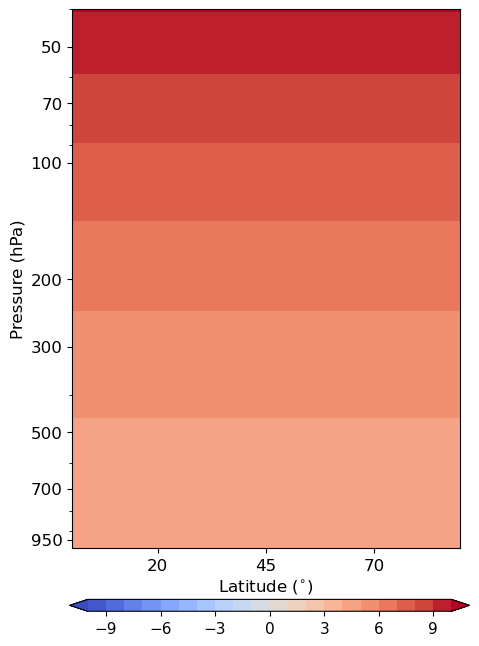

In [16]:
import matplotlib.ticker

fig, ax = plt.subplots(1, 1, figsize=(5,7))

#-----------------for temperature & qv fields--------------------

# plot ctl
tclevels = np.arange(0.01,0.026,0.002)
tclevelsd = np.arange(-0.0004,0.0005,0.0001)
tlevels=np.arange(-10,11,1)
ax_ctl  = ax.contourf(ds_ctl['lat'], p/100.,theta_4k-theta_ctl, tlevels, cmap=plt.cm.get_cmap('coolwarm'),extend='both')
#ax_ctl  = ax.contourf(ds_ctl['lat'], p/100.,N_4k_qvctl, tclevels, cmap=plt.cm.get_cmap('Spectral_r'))
#ax[0,0].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)
ax.set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax.set_ylabel('Pressure (hPa)', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

#
plt.gca().invert_yaxis()
plt.yscale('log')
ax.set_ylim(1000,40)
plt.yticks([950,700,500,300,200,100,70,50], [950,700,500,300,200,100,70,50])
ax.set_xticks([20,45,70])
ax.set_xticklabels([20,45,70])

cbaxes = fig.add_axes([0.12, 0.02, 0.8, 0.017])
        
clb = plt.colorbar(ax_ctl,
                         shrink=0.5,
                         orientation='horizontal',
                         cax = cbaxes,
                         extend='max')
        
#clb.ax.set_title('(s-1)',x=1.06, y=0, ha='left',
#                             fontsize=12, transform=clb.ax.transAxes)
clb.ax.tick_params(labelsize=11)

#fig.savefig(opath + 'Fig_initial_N_EXP4-EXP1.png', bbox_inches='tight')
plt.show(fig)
plt.close(fig)

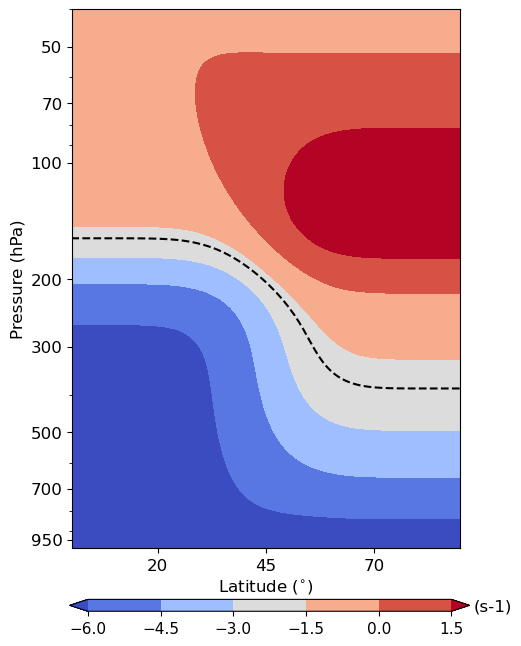

In [36]:
import matplotlib.ticker

fig, ax = plt.subplots(1, 1, figsize=(5,7))

#-----------------for temperature & qv fields--------------------

# plot ctl
tclevels = np.arange(0.01,0.026,0.002)
tclevelsd = np.arange(-0.005,0.006,0.001)
ax_ctl  = ax.contourf(ds_ctl['lat'], p/100.,dTdz_ctl, cmap=plt.cm.get_cmap('coolwarm'),extend='both')
ax_ctl2  = ax.contour(ds_ctl['lat'], p/100.,dTdz_ctl,[-10, -2, 10],colors='k')
#ax_ctl  = ax.contourf(ds_ctl['lat'], p/100.,N_4k_qvctl, tclevels, cmap=plt.cm.get_cmap('Spectral_r'))
#ax[0,0].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)
ax.set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax.set_ylabel('Pressure (hPa)', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

#
plt.gca().invert_yaxis()
plt.yscale('log')
ax.set_ylim(1000,40)
plt.yticks([950,700,500,300,200,100,70,50], [950,700,500,300,200,100,70,50])
ax.set_xticks([20,45,70])
ax.set_xticklabels([20,45,70])

cbaxes = fig.add_axes([0.12, 0.02, 0.8, 0.017])
        
clb = plt.colorbar(ax_ctl,
                         shrink=0.5,
                         orientation='horizontal',
                         cax = cbaxes,
                         extend='max')
        
clb.ax.set_title('(s-1)',x=1.06, y=0, ha='left',
                             fontsize=12, transform=clb.ax.transAxes)
clb.ax.tick_params(labelsize=11)

fig.savefig(opath + 'Fig_initial_N_EXP4-EXP1.png', bbox_inches='tight')
plt.show(fig)
plt.close(fig)

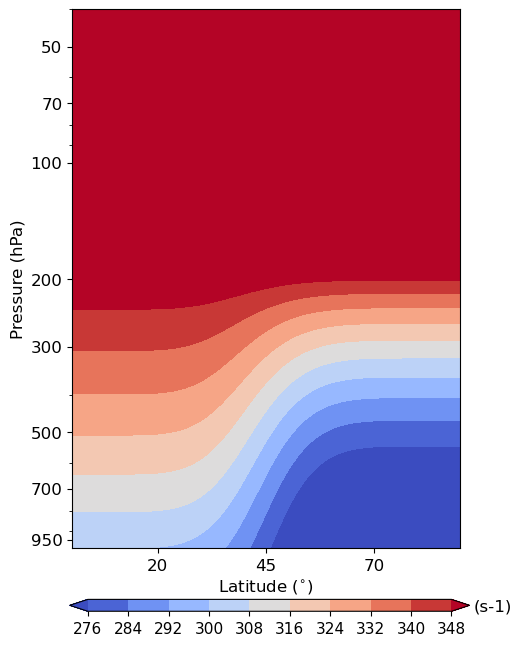

In [14]:
import matplotlib.ticker

fig, ax = plt.subplots(1, 1, figsize=(5,7))

#-----------------for temperature & qv fields--------------------

# plot ctl
tclevels = np.arange(0.01,0.026,0.002)
tclevelsd = np.arange(-0.0004,0.0005,0.0001)
ax_ctl  = ax.contourf(ds_ctl['lat'], p/100.,theta_ctl, np.arange(276,350,8), cmap=plt.cm.get_cmap('coolwarm'),extend='both')
#ax_ctl  = ax.contourf(ds_ctl['lat'], p/100.,N_4k_qvctl, tclevels, cmap=plt.cm.get_cmap('Spectral_r'))
#ax[0,0].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)
ax.set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax.set_ylabel('Pressure (hPa)', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

#
plt.gca().invert_yaxis()
plt.yscale('log')
ax.set_ylim(1000,40)
plt.yticks([950,700,500,300,200,100,70,50], [950,700,500,300,200,100,70,50])
ax.set_xticks([20,45,70])
ax.set_xticklabels([20,45,70])

cbaxes = fig.add_axes([0.12, 0.02, 0.8, 0.017])
        
clb = plt.colorbar(ax_ctl,
                         shrink=0.5,
                         orientation='horizontal',
                         cax = cbaxes,
                         extend='max')
        
clb.ax.set_title('(s-1)',x=1.06, y=0, ha='left',
                             fontsize=12, transform=clb.ax.transAxes)
clb.ax.tick_params(labelsize=11)

fig.savefig(opath + 'Fig_initial_N_EXP4-EXP1.png', bbox_inches='tight')
plt.show(fig)
plt.close(fig)

u_tanom.max= <xarray.DataArray 'U' ()>
array(44.99350357)
Coordinates:
    time     float64 2.379e+07
    lev_2    float64 1.0


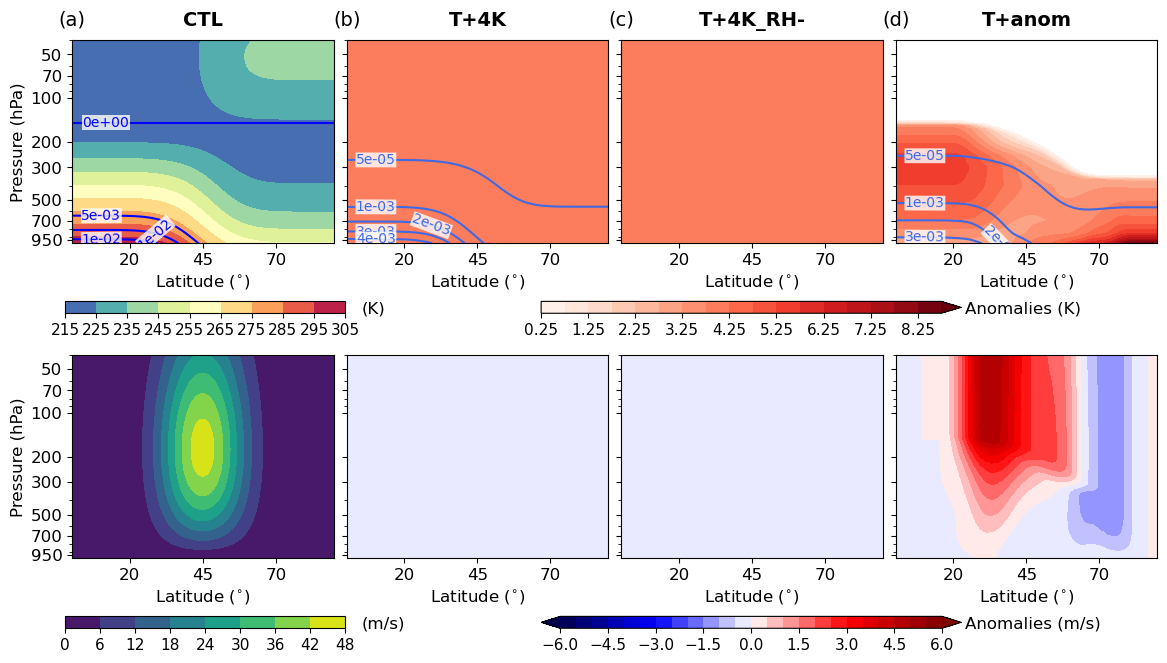

In [10]:
# plot zonal-mean temp as lat-height cross section
import matplotlib.ticker

fig, ax = plt.subplots(2, 4, figsize=(14,7), sharex=False, sharey=True)
clevels = np.arange(0.25,9.,0.5)
#clevels = [0.25,1,2,3,4,5,6,7,8,9]
tclevels = np.arange(215,310,10)
qvclevels = np.arange(5e-5,5e-3,1e-3)
qvclevelsctl = np.arange(0.,3e-2,0.5e-2)
clevels_cbar= np.linspace(-6, 6, 13)

cqv="royalblue"

#-----------------for temperature & qv fields--------------------

# plot ctl

ax_ctl  = ax[0,0].contourf(ds_ctl['lat'], p/100., temp_ctl, levels = tclevels, cmap=plt.cm.get_cmap('Spectral_r'))
ax_ctl2 = ax[0,0].contour(ds_ctl['lat'], p/100., qv_ctl, levels = qvclevelsctl, colors="blue")
clabels = plt.clabel(ax_ctl2, inline=False,fmt='%.0e', fontsize=10)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8, pad=0.3)) for txt in clabels]

#ax[0,0].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)
ax[0,0].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[0,0].set_ylabel('Pressure (hPa)', fontsize=12)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)

#
plt.gca().invert_yaxis()
plt.yscale('log')
ax[0,0].set_ylim(1000,40)
plt.yticks([950,700,500,300,200,100,70,50], [950,700,500,300,200,100,70,50])
ax[0,0].set_xticks([20,45,70])
ax[0,0].set_xticklabels([20,45,70])

#divider = make_axes_locatable(ax[0,0])
#cax_s = divider.append_axes('bottom', size='4%', pad=0.6)
#cbar = fig.colorbar(ax_ctl,cax=cax_s,orientation='horizontal',shrink=0.95, ticks=tclevels[0:-1])
#cbar.set_label(label='(K)')
#cbar.formatter.set_scientific(False)
#cbar.formatter.set_powerlimits((0, 0))
cbaxes = fig.add_axes([0.12, 0.49, 0.2, 0.017])
        
clb = plt.colorbar(ax_ctl,
                         shrink=0.5,
                         orientation='horizontal',
                         cax = cbaxes,
                         extend='max')
        
clb.ax.set_title('(K)',x=1.06, y=0, ha='left',
                             fontsize=12, transform=clb.ax.transAxes)
clb.ax.tick_params(labelsize=11)

# plot 4k
ax_4k = ax[0,1].contourf(ds_ctl['lat'], p/100., temp_4k-temp_ctl, levels = clevels, extend='max', cmap=plt.cm.get_cmap('Reds'))
ax_4k2 = ax[0,1].contour(ds_ctl['lat'], p/100., qv_4k-qv_ctl, levels = qvclevels,colors=cqv)
clabels = plt.clabel(ax_4k2, inline=False,fmt='%.0e', fontsize=10)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8, pad=0.3)) for txt in clabels]

#ax[0,1].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)

ax[0,1].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
ax[0,1].set_xticks([20,45,70])
ax[0,1].set_xticklabels([20,45,70])
#ax[0,1].set_ylabel('Pressure (hPa)', fontsize=12)

#divider = make_axes_locatable(ax[0,1])
#cax_s = divider.append_axes('bottom', size='4%', pad=0.6)
#cbar = fig.colorbar(ax_4k,cax=cax_s,orientation='horizontal',shrink=0.95)
#cbar.set_label(label='(K)')
#cbar.formatter.set_scientific(False)
#cbar.formatter.set_powerlimits((0, 0))

# plot 4k_qvctl
ax_4k_qvctl = ax[0,2].contourf(ds_ctl['lat'], p/100., temp_4k_qvctl-temp_ctl, levels = clevels, extend='max', cmap=plt.cm.get_cmap('Reds'))
#ax_4k_qvctl2 = ax[0,2].contour(ds_ctl['lat'], p/100., qv_4k_qvctl-qv_ctl, levels = qvclevels,colors=cqv)
#ax[0,2].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)

ax[0,2].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
ax[0,2].set_xticks([20,45,70])
ax[0,2].set_xticklabels([20,45,70])
#ax[0,2].set_ylabel('Pressure (hPa)', fontsize=12)

#divider = make_axes_locatable(ax[0,2])
#cax_s = divider.append_axes('bottom', size='4%', pad=0.6)
#cbar = fig.colorbar(ax_4k_qvctl,cax=cax_s,orientation='horizontal',shrink=0.95)
#cbar.set_label(label='(K)')
#cbar.formatter.set_scientific(False)
#cbar.formatter.set_powerlimits((0, 0))

cbaxes = fig.add_axes([0.46, 0.49, 0.3, 0.017])
        
clb = plt.colorbar(ax_4k_qvctl,
                         shrink=0.5,
                         orientation='horizontal',
                         cax = cbaxes,
                         extend='max')
        
clb.ax.set_title('Anomalies (K)',x=1.06, y=0, ha='left',
                             fontsize=12, transform=clb.ax.transAxes)
clb.ax.tick_params(labelsize=11)


# plot tanom
ax_tanom = ax[0,3].contourf(ds_ctl['lat'], p/100., temp_tanom-temp_ctl, levels = clevels, extend='max', cmap=plt.cm.get_cmap('Reds'))
ax_tanom2 = ax[0,3].contour(ds_ctl['lat'], p/100., qv_tanom-qv_ctl, levels = qvclevels,colors=cqv)
clabels = plt.clabel(ax_tanom2, inline=False,fmt='%.0e', fontsize=10)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8, pad=0.3)) for txt in clabels]

#ax[0,3].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)

ax[0,3].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[0,3].tick_params(axis='both', which='major', labelsize=12)
ax[0,3].set_xticks([20,45,70])
ax[0,3].set_xticklabels([20,45,70])
#ax[0,3].set_ylabel('Pressure (hPa)', fontsize=12)

#divider = make_axes_locatable(ax[0,3])
#cax_s = divider.append_axes('bottom', size='4%', pad=0.6)
#cbar = fig.colorbar(ax_tanom,cax=cax_s,orientation='horizontal',shrink=0.95)
#cbar.set_label(label='(K)')
#cbar.formatter.set_scientific(False)
#cbar.formatter.set_powerlimits((0, 0))


ax[0,0].set_title('CTL', fontsize=14, weight='bold',y=1.03)
ax[0,1].set_title('T+4K', fontsize=14, weight='bold',y=1.03)
ax[0,2].set_title('T+4K_RH-', fontsize=14, weight='bold',y=1.03)
ax[0,3].set_title('T+anom', fontsize=14, weight='bold',y=1.03)

plt.text(0, 1.15, '(a)', ha='center', va='top', transform=ax[0,0].transAxes, fontsize=14) 
plt.text(0, 1.15, '(b)', ha='center', va='top', transform=ax[0,1].transAxes, fontsize=14) 
plt.text(0, 1.15, '(c)', ha='center', va='top', transform=ax[0,2].transAxes, fontsize=14) 
plt.text(0, 1.15, '(d)', ha='center', va='top', transform=ax[0,3].transAxes, fontsize=14) 
#-----------------for zonal wind field--------------------
clevels = np.arange(-6,6.5,0.5)

# plot ctl
ax_ctl = ax[1,0].contourf(ds_ctl['lat'], p/100., u_ctl)

#ax[1,0].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)
ax[1,0].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[1,0].set_ylabel('Pressure (hPa)', fontsize=12)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)

plt.gca().invert_yaxis()
plt.yscale('log')
ax[1,0].set_ylim(1000,40)
plt.yticks([950,700,500,300,200,100,70,50], [950,700,500,300,200,100,70,50])
ax[1,0].set_xticks([20,45,70])
ax[1,0].set_xticklabels([20,45,70])

#divider = make_axes_locatable(ax[1,0])
#cax_s = divider.append_axes('bottom', size='4%', pad=0.6)
#cbar = fig.colorbar(ax_ctl,cax=cax_s,orientation='horizontal',shrink=0.95)
#cbar.set_label(label='(m/s)')
#cbar.formatter.set_scientific(False)
#cbar.formatter.set_powerlimits((0, 0))

cbaxes = fig.add_axes([0.12, 0.04, 0.2, 0.017])
        
clb = plt.colorbar(ax_ctl,
                         shrink=0.5,
                         orientation='horizontal',
                         cax = cbaxes,
                         extend='max')
        
clb.ax.set_title('(m/s)',x=1.06, y=0, ha='left',
                             fontsize=12, transform=clb.ax.transAxes)
clb.ax.tick_params(labelsize=11)

# plot 4k
ax_4k = ax[1,1].contourf(ds_ctl['lat'], p/100., u_4k-u_ctl, levels = clevels, extend='both', cmap=plt.cm.get_cmap('seismic'))
#ax[1,1].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)
ax[1,1].set_xticks([20,45,70])
ax[1,1].set_xticklabels([20,45,70])
ax[1,1].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)

#ax[1,1].set_ylabel('Pressure (hPa)', fontsize=12)

#divider = make_axes_locatable(ax[1,1])
#cax_s = divider.append_axes('bottom', size='4%', pad=0.6)
#cbar = fig.colorbar(ax_4k,cax=cax_s,orientation='horizontal',shrink=0.95)

#cbar.set_label(label='(m/s)')
#cbar.set_ticks(clevels_cbar)
#cbar.formatter.set_scientific(False)
#cbar.formatter.set_powerlimits((0, 0))

# plot 4k_qvctl
ax_4k_qvctl = ax[1,2].contourf(ds_ctl['lat'], p/100., u_4k_qvctl-u_ctl, levels = clevels, extend='both', cmap=plt.cm.get_cmap('seismic'))
#ax[1,2].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)
ax[1,2].set_xticks([20,45,70])
ax[1,2].set_xticklabels([20,45,70])

ax[1,2].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)

#ax[1,2].set_ylabel('Pressure (hPa)', fontsize=12)

#divider = make_axes_locatable(ax[1,2])
#cax_s = divider.append_axes('bottom', size='4%', pad=0.6)
#cbar = fig.colorbar(ax_4k_qvctl,cax=cax_s,orientation='horizontal',shrink=0.95)

#cbar.set_label(label='(m/s)')
#cbar.set_ticks(clevels_cbar)
#cbar.formatter.set_scientific(False)
#cbar.formatter.set_powerlimits((0, 0))

cbaxes = fig.add_axes([0.46, 0.04, 0.3, 0.017])
        
clb = plt.colorbar(ax_4k_qvctl,
                         shrink=0.5,
                         orientation='horizontal',
                         cax = cbaxes,
                         extend='max')
        
clb.ax.set_title('Anomalies (m/s)',x=1.06, y=0, ha='left',
                             fontsize=12, transform=clb.ax.transAxes)
clb.ax.tick_params(labelsize=11)

# plot tanom
ax_tanom = ax[1,3].contourf(ds_ctl['lat'], p/100., u_tanom-u_ctl, levels = clevels, extend='both', cmap=plt.cm.get_cmap('seismic'))
#ax_tanom = ax[1,3].contourf(ds_ctl['lat'], p/100., u_tanom)

print('u_tanom.max=', np.max(u_ctl))
ax[1,3].set_xticks([20,45,70])
ax[1,3].set_xticklabels([20,45,70])
#ax[1,3].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)

ax[1,3].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[1,3].tick_params(axis='both', which='major', labelsize=12)


#ax[1,3].set_ylabel('Pressure (hPa)', fontsize=12)

#divider = make_axes_locatable(ax[1,3])
#cax_s = divider.append_axes('bottom', size='4%', pad=0.6)
#cbar = fig.colorbar(ax_tanom,cax=cax_s,orientation='horizontal',shrink=0.95)

#cbar.set_label(label='(m/s)')
#cbar.set_ticks(clevels_cbar)
#cbar.formatter.set_scientific(False)
#cbar.formatter.set_powerlimits((0, 0))


plt.subplots_adjust(wspace = 0.05, hspace = 0.55, bottom=0.14)

fig.savefig(opath + 'Fig_inidata_T_qv_overview_EXP1-4.png', bbox_inches='tight')
plt.show(fig)
plt.close(fig)
del fig, ax

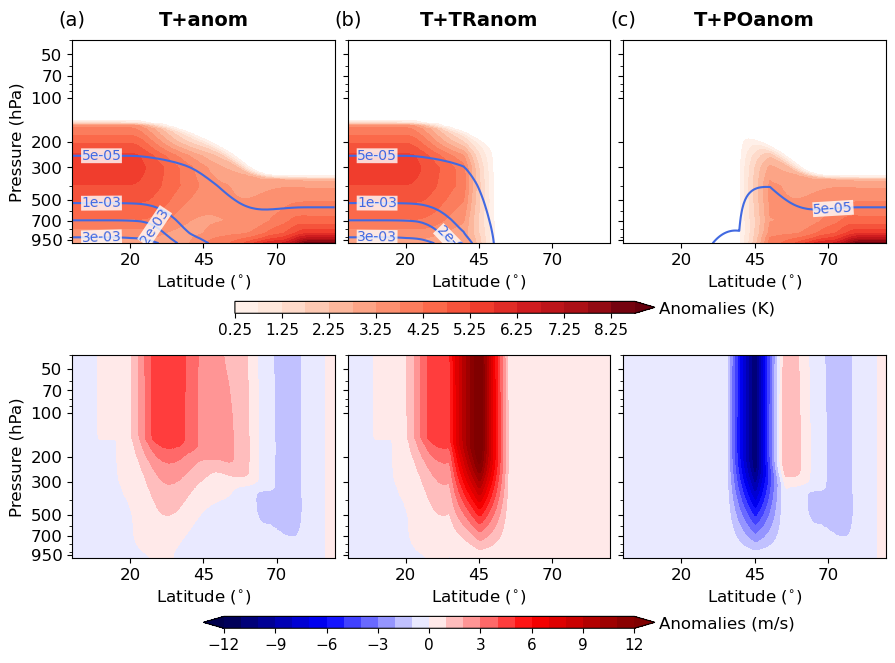

In [11]:
# plot zonal-mean temp as lat-height cross section
import matplotlib.ticker

fig, ax = plt.subplots(2, 3, figsize=(10.5,7), sharex=False, sharey=True)
clevels = np.arange(0.25,9.,0.5)
#clevels = [0.25,1,2,3,4,5,6,7,8,9]
tclevels = np.arange(215,310,10)
qvclevels = np.arange(5e-5,5e-3,1e-3)
qvclevelsctl = np.arange(0.,3e-2,0.5e-2)
clevels_cbar= np.linspace(-6, 6, 13)

cqv="royalblue"

#-----------------for temperature & qv fields--------------------

# plot tanom

ax_tanom  = ax[0,0].contourf(ds_ctl['lat'], p/100., temp_tanom-temp_ctl, levels = clevels, cmap=plt.cm.get_cmap('Reds'))
ax_tanom2 = ax[0,0].contour(ds_ctl['lat'], p/100., qv_tanom-qv_ctl, levels = qvclevels, colors=cqv)
clabels = plt.clabel(ax_tanom2, inline=False,fmt='%.0e', fontsize=10)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8, pad=0.3)) for txt in clabels]

#ax[0,0].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)
ax[0,0].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[0,0].set_ylabel('Pressure (hPa)', fontsize=12)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)

#
plt.gca().invert_yaxis()
plt.yscale('log')
ax[0,0].set_ylim(1000,40)
plt.yticks([950,700,500,300,200,100,70,50], [950,700,500,300,200,100,70,50])
ax[0,0].set_xticks([20,45,70])
ax[0,0].set_xticklabels([20,45,70])

#divider = make_axes_locatable(ax[0,0])
#cax_s = divider.append_axes('bottom', size='4%', pad=0.6)
#cbar = fig.colorbar(ax_ctl,cax=cax_s,orientation='horizontal',shrink=0.95, ticks=tclevels[0:-1])
#cbar.set_label(label='(K)')
#cbar.formatter.set_scientific(False)
#cbar.formatter.set_powerlimits((0, 0))


# plot TR tanom
ax_tr = ax[0,1].contourf(ds_ctl['lat'], p/100., temp_tanom_tr-temp_ctl, levels = clevels, extend='max', cmap=plt.cm.get_cmap('Reds'))
ax_tr2 = ax[0,1].contour(ds_ctl['lat'], p/100., qv_tanom_tr-qv_ctl, levels = qvclevels,colors=cqv)
clabels = plt.clabel(ax_tr2, inline=False,fmt='%.0e', fontsize=10)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8, pad=0.3)) for txt in clabels]

#ax[0,1].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)

ax[0,1].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
ax[0,1].set_xticks([20,45,70])
ax[0,1].set_xticklabels([20,45,70])
#ax[0,1].set_ylabel('Pressure (hPa)', fontsize=12)

#divider = make_axes_locatable(ax[0,1])
#cax_s = divider.append_axes('bottom', size='4%', pad=0.6)
#cbar = fig.colorbar(ax_4k,cax=cax_s,orientation='horizontal',shrink=0.95)
#cbar.set_label(label='(K)')
#cbar.formatter.set_scientific(False)
#cbar.formatter.set_powerlimits((0, 0))

# plot PO tanom
ax_po = ax[0,2].contourf(ds_ctl['lat'], p/100., temp_tanom_po-temp_ctl, levels = clevels, extend='max', cmap=plt.cm.get_cmap('Reds'))
ax_po2 = ax[0,2].contour(ds_ctl['lat'], p/100., qv_tanom_po-qv_ctl, levels = qvclevels,colors=cqv)
clabels = plt.clabel(ax_po2, inline=False,fmt='%.0e', fontsize=10)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8, pad=0.3)) for txt in clabels]


ax[0,2].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
ax[0,2].set_xticks([20,45,70])
ax[0,2].set_xticklabels([20,45,70])
#ax[0,2].set_ylabel('Pressure (hPa)', fontsize=12)

#divider = make_axes_locatable(ax[0,2])
#cax_s = divider.append_axes('bottom', size='4%', pad=0.6)
#cbar = fig.colorbar(ax_4k_qvctl,cax=cax_s,orientation='horizontal',shrink=0.95)
#cbar.set_label(label='(K)')
#cbar.formatter.set_scientific(False)
#cbar.formatter.set_powerlimits((0, 0))

cbaxes = fig.add_axes([0.28, 0.49, 0.4, 0.017])
        
clb = plt.colorbar(ax_po,
                         shrink=0.5,
                         orientation='horizontal',
                         cax = cbaxes,
                         extend='max')
        
clb.ax.set_title('Anomalies (K)',x=1.06, y=0, ha='left',
                             fontsize=12, transform=clb.ax.transAxes)
clb.ax.tick_params(labelsize=11)



ax[0,0].set_title('T+anom', fontsize=14, weight='bold',y=1.03)
ax[0,1].set_title('T+TRanom', fontsize=14, weight='bold',y=1.03)
ax[0,2].set_title('T+POanom', fontsize=14, weight='bold',y=1.03)


plt.text(0, 1.15, '(a)', ha='center', va='top', transform=ax[0,0].transAxes, fontsize=14) 
plt.text(0, 1.15, '(b)', ha='center', va='top', transform=ax[0,1].transAxes, fontsize=14) 
plt.text(0, 1.15, '(c)', ha='center', va='top', transform=ax[0,2].transAxes, fontsize=14) 

#-----------------for zonal wind field--------------------
clevels = np.arange(-12,13,1)

# plot tanom
ax_tanom = ax[1,0].contourf(ds_ctl['lat'], p/100., u_tanom-u_ctl, levels = clevels, extend='both', cmap=plt.cm.get_cmap('seismic'))
ax[1,0].set_xticks([20,45,70])
ax[1,0].set_xticklabels([20,45,70])
#ax[1,3].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)

ax[1,0].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[1,0].set_ylabel('Pressure (hPa)', fontsize=12)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)

plt.gca().invert_yaxis()
plt.yscale('log')
ax[1,0].set_ylim(1000,40)
plt.yticks([950,700,500,300,200,100,70,50], [950,700,500,300,200,100,70,50])
ax[1,0].set_xticks([20,45,70])
ax[1,0].set_xticklabels([20,45,70])


# plot TR tanom
ax_tanom_tr= ax[1,1].contourf(ds_ctl['lat'], p/100., u_tanom_tr-u_ctl, levels = clevels, extend='both', cmap=plt.cm.get_cmap('seismic'))
#ax[1,2].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)
ax[1,1].set_xticks([20,45,70])
ax[1,1].set_xticklabels([20,45,70])

ax[1,1].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)

#ax[1,2].set_ylabel('Pressure (hPa)', fontsize=12)

#divider = make_axes_locatable(ax[1,2])
#cax_s = divider.append_axes('bottom', size='4%', pad=0.6)
#cbar = fig.colorbar(ax_4k_qvctl,cax=cax_s,orientation='horizontal',shrink=0.95)

#cbar.set_label(label='(m/s)')
#cbar.set_ticks(clevels_cbar)
#cbar.formatter.set_scientific(False)
#cbar.formatter.set_powerlimits((0, 0))

# plot PO tanom
ax_tanom_po= ax[1,2].contourf(ds_ctl['lat'], p/100., u_tanom_po-u_ctl, levels = clevels, extend='both', cmap=plt.cm.get_cmap('seismic'))
#ax[1,2].axvline(45, linestyle = "--", color = "dimgray", linewidth=0.5)
ax[1,2].set_xticks([20,45,70])
ax[1,2].set_xticklabels([20,45,70])

ax[1,2].set_xlabel('Latitude ($^{\circ}$)', fontsize=12)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)

cbaxes = fig.add_axes([0.25, 0.04, 0.43, 0.017])
        
clb = plt.colorbar(ax_tanom_po,
                         shrink=0.5,
                         orientation='horizontal',
                         cax = cbaxes,
                         extend='max')
        
clb.ax.set_title('Anomalies (m/s)',x=1.06, y=0, ha='left',
                             fontsize=12, transform=clb.ax.transAxes)
clb.ax.tick_params(labelsize=11)



plt.subplots_adjust(wspace = 0.05, hspace = 0.55, bottom=0.14)

fig.savefig(opath + 'FigS_inidata_T_qv_overview_EXP4-6.png', bbox_inches='tight')
plt.show(fig)
plt.close(fig)
del fig, ax